# Follow-up for Aqinvert QC review

# Review Notes from QC meeting 9/27/2024 with Hope, Cameron and Gareth

------------------------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("aqinvert_counts_thru_2023.csv")

In [4]:
df

,ParkName,ParkCode,LocationID,PeriodID,EventID,RiffleNo,Replicate,TaxonCode,LargeRare,RepCount,Note
0,Buffalo National River,BUFF,BUFFRMINVEBM01,BUFFRMINVE2007Nov26,BUFFRMINVE2007Dec04,1,L,PHYSPY,0,1,NaN
1,Buffalo National River,BUFF,BUFFRMINVEBM01,BUFFRMINVE2007Nov26,BUFFRMINVE2007Dec04,1,L,HYDSCH,1,1,NaN
2,Buffalo National River,BUFF,BUFFRMINVEBM01,BUFFRMINVE2007Nov26,BUFFRMINVE2007Dec04,1,L,HYDSHY,0,1,NaN
3,Buffalo National River,BUFF,BUFFRMINVEBM01,BUFFRMINVE2007Nov26,BUFFRMINVE2007Dec04,1,L,HYDTHY,0,2,NaN
4,Buffalo National River,BUFF,BUFFRMINVEBM01,BUFFRMINVE2007Nov26,BUFFRMINVE2007Dec04,1,L,ISONIS,0,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...
82592,Wilson's Creek National Battlefield,WICR,WICRAQUBUG04,WICRAquBug2022Jun02,WICRAquBug2022Jun02,3,R,BAETAP,0,1,NaN
82593,Wilson's Creek National Battlefield,WICR,WICRAQUBUG04,WICRAquBug2022Jun02,WICRAquBug2022Jun02,3,R,BAETAC,0,5,NaN
82594,Wilson's Creek National Battlefield,WICR,WICRAQUBUG04,WICRAquBug2022Jun02,WICRAquBug2022Jun02,3,R,ASELLI,0,22,NaN
82595,Wilson's Creek National Battlefield,WICR,WICRAQUBUG04,WICRAquBug2022Jun02,WICRAquBug2022Jun02,3,R,TROM,0,2,NaN


----------------------------------------------------------------

# OUTLIER ISSUES

# Here, we're looking at the outlier RepCount over all the dataset

array([[<Axes: title={'center': 'RepCount'}>]], dtype=object)

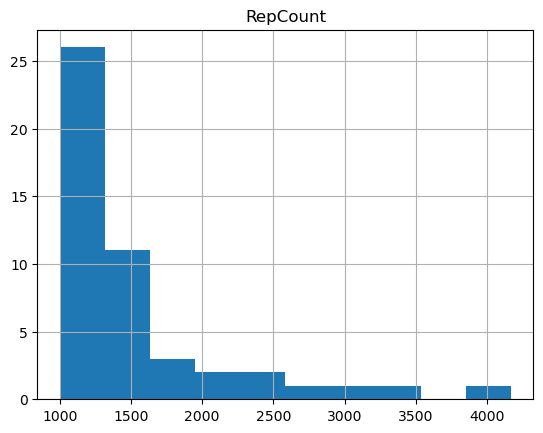

In [5]:
cols = ['RepCount']
df2 = df[df[cols] > 1000]
df2.hist(column='RepCount')

# The question was, what record has a RepCount of 4000??

In [6]:
filtered_df = df[df['RepCount'] > 3500]
print(filtered_df)

                                  ParkName ParkCode    LocationID  \
81585  Wilson's Creek National Battlefield     WICR  WICRAQUBUG04   

                  PeriodID              EventID  RiffleNo Replicate TaxonCode  \
81585  WICRAqubug2006Jun14  WICRAqubug2006Jun14         2         R      CHIR   

       LargeRare  RepCount                                         Note  
81585          0      4168  rollup of Chironomidae subfamily and genera  


# Next, we are looking at outliers in water quality - dissolved oyxgen

# The question was which parks had DOs of 14 - 18

In [7]:
df = pd.read_csv("riffle_water_quality.csv")

array([[<Axes: title={'center': 'DO'}>]], dtype=object)

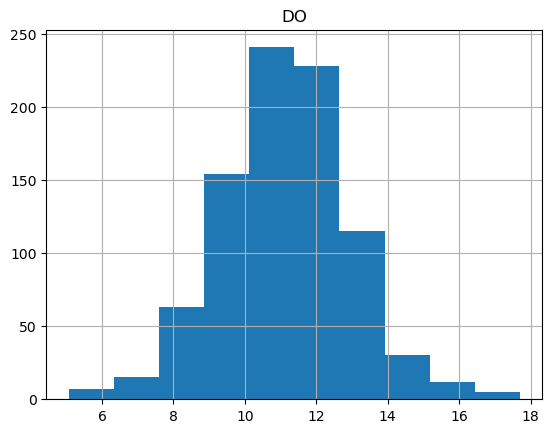

In [8]:
cols = ['DO']
df2 = df[df[cols] > 0]
df2.hist(column='DO')

# LocationIDs where DO >= 14

In [9]:
df = df[['LocationID', 'DO']]
df = df[df['DO'] >= 14]
df = df.drop_duplicates()
pd.set_option('display.max_rows', None)
print(df)

         LocationID     DO
16   BUFFRMINVEBM01  14.61
42   BUFFRMINVEBM02  14.82
43   BUFFRMINVEBM02  15.26
44   BUFFRMINVEBM02  14.70
76   BUFFRMINVEBM03  14.04
77   BUFFRMINVEBM03  14.08
111  BUFFRMINVEBM04  14.54
114  BUFFRMINVEBM04  16.09
115  BUFFRMINVEBM04  15.48
116  BUFFRMINVEBM04  15.86
140  BUFFRMINVEBM05  14.60
150  BUFFRMINVEBM05  15.17
151  BUFFRMINVEBM05  15.41
152  BUFFRMINVEBM05  15.28
156  BUFFRMINVEBM05  14.65
157  BUFFRMINVEBM05  14.97
158  BUFFRMINVEBM05  15.59
184  BUFFRMINVEBM06  14.29
185  BUFFRMINVEBM06  14.07
189  BUFFRMINVEBM06  15.49
190  BUFFRMINVEBM06  15.41
191  BUFFRMINVEBM06  14.93
270  BUFFRMINVEBT10  14.41
271  BUFFRMINVEBT10  14.39
273  BUFFRMINVEBT11  14.62
275  BUFFRMINVEBT11  14.64
277  BUFFRMINVEBT13  14.23
279  BUFFRMINVEBT13  14.36
280  BUFFRMINVEBT13  14.15
281  BUFFRMINVEBT13  14.22
324  BUFFRMINVEBT19  14.81
326  BUFFRMINVEBT19  14.77
328  BUFFRMINVEBT19  14.16
336  BUFFRMINVEBT20  16.68
337  BUFFRMINVEBT20  16.50
338  BUFFRMINVEBT20  16.63
3

------------

# Values that need to be represented as integers or categoricals in the data package

# StretchNumber in location_details needs to be integer

In [10]:
df = pd.read_csv("location_details.csv")
df['StretchNumber'].unique()  

array([ 24.,  55.,  59.,  69.,  73.,  87., 279., 481., 640., 441., 462.,
       403., 646., 229., 420., 638., 317., 242., 244., 367., 383., 225.,
       304., 232., 378., 472., 241., 300., 574., 649., 238., 694., 476.,
       484., 366., 603., 623., 275., 390.,  nan,  14.,  35.,  46.,  67.,
        71.,  97., 819., 850., 576., 920., 473., 917., 494., 657., 695.,
       711., 930., 950., 685., 463., 734., 856., 104., 114., 123., 907.,
       542., 699.])

# Embeddedness through organics in riffle sample details are riffle cover classes and need to be integer

In [14]:
pd.reset_option('display.max_rows')
df = pd.read_csv("riffle_sample_details.csv")
df

,ParkName,ParkCode,LocationID,PeriodID,EventID,RiffleNo,Replicate,Width,Depth,Velocity,Substrate,Embeddedness,Vegetation,Algae,Periphyton,Deposition,Organics,Notes
0,Buffalo National River,BUFF,BUFFRMINVEBM01,BUFFRMINVE2007Nov26,BUFFRMINVE2007Dec04,1,L,7.7,15.0,0.13,15.0,2.0,0.0,1.0,2.0,2.0,2.0,NaN
1,Buffalo National River,BUFF,BUFFRMINVEBM01,BUFFRMINVE2007Nov26,BUFFRMINVE2007Dec04,1,M,13.4,10.0,0.35,15.0,2.0,0.0,0.0,2.0,3.0,3.0,NaN
2,Buffalo National River,BUFF,BUFFRMINVEBM01,BUFFRMINVE2007Nov26,BUFFRMINVE2007Dec04,1,R,15.9,7.0,0.11,15.0,2.0,0.0,0.0,2.0,3.0,2.0,NaN
3,Buffalo National River,BUFF,BUFFRMINVEBM01,BUFFRMINVE2007JAN04,BUFFRMINVE2007JAN08,1,L,24.0,42.0,0.77,15.0,3.0,0.0,0.0,2.0,2.0,2.0,NaN
4,Buffalo National River,BUFF,BUFFRMINVEBM01,BUFFRMINVE2007JAN04,BUFFRMINVE2007JAN08,1,M,20.0,43.0,0.73,14.0,2.0,0.0,1.0,2.0,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,Wilson's Creek National Battlefield,WICR,WICRAQUBUG04,WICRAquBug2019Jun03,WICRAquBug2019Jun11,3,M,-999.0,20.0,0.59,14.0,2.0,1.0,0.0,1.0,-999.0,-999.0,NaN
3297,Wilson's Creek National Battlefield,WICR,WICRAQUBUG04,WICRAquBug2019Jun03,WICRAquBug2019Jun11,3,R,-999.0,27.0,0.61,14.0,2.0,0.0,0.0,2.0,-999.0,-999.0,NaN
3298,Wilson's Creek National Battlefield,WICR,WICRAQUBUG04,WICRAquBug2022Jun02,WICRAquBug2022Jun02,3,L,-999.0,12.0,0.68,12.0,1.0,1.0,0.0,2.0,-999.0,-999.0,NaN
3299,Wilson's Creek National Battlefield,WICR,WICRAQUBUG04,WICRAquBug2022Jun02,WICRAquBug2022Jun02,3,M,-999.0,18.0,0.57,13.0,1.0,0.0,0.0,3.0,-999.0,-999.0,NaN


# Precision of decimal degrees of reach coodinates is correct - tested in Power BI

In [15]:
df = pd.read_csv("reach_coordinates.csv")
df

,Status,ReachID,ActiveDates,startUTMZone,XstartUTM,YstartUTM,startUTMDatum,XstartDD,YstartDD,startDDDatum,dwcType,dwcBasisOfRecord
0,Active,HOMELOW01,2004 - Present,14N,684033.9984,4462184.586,EPSG:32614,-96.835,40.290,EPSG:4326,Event,MachineObservation
1,Retired,HOMEUPP01,2004,14N,683556.2183,4461639.216,EPSG:32614,-96.841,40.285,EPSG:4326,Event,MachineObservation
2,Active,PIPELOW01,2001 - Present,14N,714317.9134,4877116.472,EPSG:32614,-96.326,44.016,EPSG:4326,Event,MachineObservation
3,Retired,PIPEMID01,2001 - 2006,14N,714488.4427,4876962.659,EPSG:32614,-96.324,44.014,EPSG:4326,Event,MachineObservation
4,Retired,PIPEUPP01,2001 - 2006,14N,714726.4025,4877069.000,EPSG:32614,-96.321,44.015,EPSG:4326,Event,MachineObservation
...,...,...,...,...,...,...,...,...,...,...,...,...
105,Active,BUFFT20,2009 - Present,15N,527094.5304,3982824.761,EPSG:32615,-92.699,35.989,EPSG:4326,Event,MachineObservation
106,Active,BUFFT23,2009 - Present,15N,537818.3262,3989678.235,EPSG:32615,-92.580,36.051,EPSG:4326,Event,MachineObservation
107,Active,BUFFT27,2010 - Present,15N,540753.9035,3998691.588,EPSG:32615,-92.547,36.132,EPSG:4326,Event,MachineObservation
108,Retired,BUFFT29,2010,15N,547354.7112,3992058.809,EPSG:32615,-92.474,36.072,EPSG:4326,Event,MachineObservation
